**Aplicación de la técnica para desequilibrio de datos Random Oversampling**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 1. Libraries Implemented

In [ ]:
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## 2.2 Data Loading

In [ ]:
credit = pd.read_csv("/content/drive/MyDrive/german_credit_data.csv")

In [ ]:
credit.head()   

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit.drop('Unnamed: 0', axis=1, inplace=True) # Eliminando columna Unnamed del dataframe

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit["Default"] = credit["Risk"] # Creando la variable Default  (asignación de Risk a Default)
credit.info() # Validando que la variable Default se creo

# print(data.rename(columns={'Index': 'newname'})) renombrar columnas con pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Default           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [ ]:
credit = credit.drop(columns="Risk")

In [ ]:
#credit.drop([ 'Risk'], axis=1) # Eliminando la varible Risk
credit.info # Validando que la variable Risk  se elimino

<bound method DataFrame.info of      Age     Sex  Job  ... Duration              Purpose Default
0     67    male    2  ...        6             radio/TV    good
1     22  female    2  ...       48             radio/TV     bad
2     49    male    1  ...       12            education    good
3     45    male    2  ...       42  furniture/equipment    good
4     53    male    2  ...       24                  car     bad
..   ...     ...  ...  ...      ...                  ...     ...
995   31  female    1  ...       12  furniture/equipment    good
996   40    male    3  ...       30                  car    good
997   38    male    2  ...       12             radio/TV    good
998   23    male    2  ...       45             radio/TV     bad
999   27    male    2  ...       45                  car    good

[1000 rows x 10 columns]>

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit['Default'].value_counts()

good    700
bad     300
Name: Default, dtype: int64

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Default           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


***Removiendo  NaN's missing***

In [ ]:
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Default               0
dtype: int64

In [ ]:
# Removing NaN's from 'Saving accounts' and 'Checking account' column

In [ ]:
credit['Saving accounts'] = credit['Saving accounts'].fillna(value = 'NA') # Rellena con NA

In [ ]:
print(credit['Saving accounts'].value_counts())  # frecuencia de las categorias de Saving accounts

#Construye la distribución de frecuencias de la variable Saving accounts, con los NA


little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [ ]:
credit['Checking account'] = credit['Checking account'].fillna(value = 'NA')

In [ ]:
credit['Checking account'].value_counts() 

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
credit.isnull().sum()  # Comprobando que elimino los missing  NaN

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Default             0
dtype: int64

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NA,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NA,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


**Análisis de Datos Exploratorios**

In [ ]:
#Plot de  Conteo de target según sexo

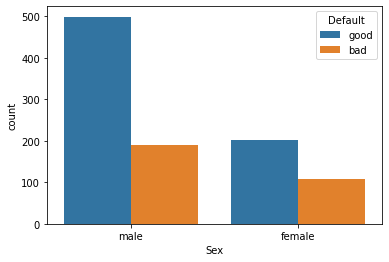

In [ ]:
sns.countplot(x= 'Sex', data = credit, hue= 'Default') # A python le importan las mayusculas

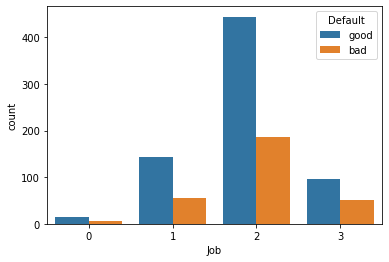

In [ ]:
sns.countplot(x= 'Job', data = credit, hue= 'Default')

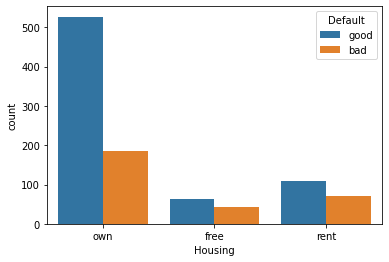

In [ ]:
sns.countplot(x= 'Housing', data = credit, hue= 'Default')

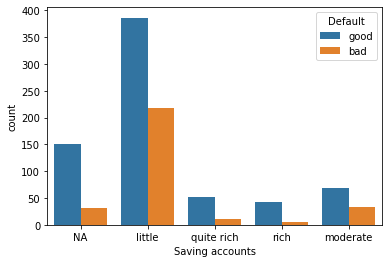

In [ ]:
sns.countplot(x= 'Saving accounts', data = credit, hue= 'Default')

####  Proporción de  Savings Account con little o  moderate ingreso y su nivel de Default

In [ ]:
print("\nLittle Income :\n",credit[credit['Saving accounts'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income\n", credit[credit['Saving accounts'] == 'moderate']['Default'].value_counts().to_frame())


Little Income :
       Default
good      386
bad       217

Moderate Income
       Default
good       69
bad        34


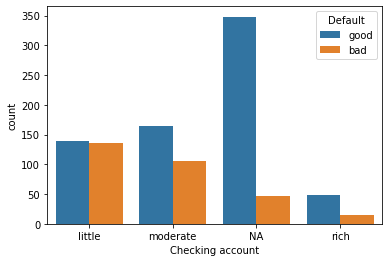

In [ ]:
sns.countplot(x= 'Checking account', data = credit, hue= 'Default')

#### Proporción  de Checkings Account con little o  moderate ingreso y su  nivel de  default

In [ ]:
print("\nLittle Income :\n",credit[credit['Checking account'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income :\n",credit[credit['Checking account'] == 'moderate']['Default'].value_counts().to_frame())


Little Income :
       Default
good      139
bad       135

Moderate Income :
       Default
good      164
bad       105


**Ingeniería de características**

Según la inferencia de 'Cuenta de ahorros' y 'Cuenta corriente', podemos agrupar las columnas en 3 categorías:

'Little'

'Moderate'

'Other'

In [ ]:
# 'Saving Account'
credit['Saving accounts']=credit['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [ ]:
# 'Checking Account'
credit['Checking account']= credit['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [ ]:
## LabeEncoding the Purpose column
le = LabelEncoder()
credit['Purpose'] = le.fit_transform(credit['Purpose'])

In [ ]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


In [ ]:
credit.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,other,little,1169,6,5,good
1,22,female,2,own,little,moderate,5951,48,5,bad
2,49,male,1,own,little,other,2096,12,3,good
3,45,male,2,free,little,little,7882,42,4,good
4,53,male,2,free,little,little,4870,24,1,bad


**Procesamiento de datos**

**Asignación de características 'Dependente' e 'Independentes' **

In [ ]:
##credit['default'] = credit['default'].map({'no':0, 'yes': 1})

credit['Default'] = credit['Default'].map({'good':0, 'bad': 1})

In [ ]:
print(credit['Default'].value_counts()) ## Distribución de frecuencia del target Default

0    700
1    300
Name: Default, dtype: int64


In [ ]:
#separating the y-column from the rest of the data

X=credit.drop("Default", axis=1)

y=credit["Default"]


In [ ]:
x1 = X.copy()

In [ ]:
x1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,other,little,1169,6,5
1,22,female,2,own,little,moderate,5951,48,5
2,49,male,1,own,little,other,2096,12,3
3,45,male,2,free,little,little,7882,42,4
4,53,male,2,free,little,little,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,other,1736,12,4
996,40,male,3,own,little,little,3857,30,1
997,38,male,2,own,little,other,804,12,5
998,23,male,2,free,little,little,1845,45,5


**Estandarización de datos: Dumificación de características categóricas y Estandarización de características numéricas**

In [ ]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)


Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']


In [ ]:
# List to store Numerical Columns

num_cols = list(x1.columns[x1.dtypes!= 'object'])
print("\nNumerical Columns:" ,num_cols)



Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


**Etiquetado de caracteristicas categóricas:**
    
###### La mayor parte de los agoritmos de ML, trabajan con caracteristicas numericas.    

In [ ]:
## One-Hot Encoding Categorical Columns
## drop_first=True evita la multicolibnealidad entre las caracteristicas

x1_dummy=pd.get_dummies(x1[cat_cols], drop_first=True)


In [ ]:
x1_dummy 

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other
0,1,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1
996,1,1,0,0,0,0,0
997,1,1,0,0,0,0,1
998,1,0,0,0,0,0,0


In [ ]:
## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')
#x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

In [ ]:
x_new

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other,Age,Job,Credit amount,Duration,Purpose
0,1,1,0,0,1,0,0,67,2,1169,6,5
1,0,1,0,0,0,1,0,22,2,5951,48,5
2,1,1,0,0,0,0,1,49,1,2096,12,3
3,1,0,0,0,0,0,0,45,2,7882,42,4
4,1,0,0,0,0,0,0,53,2,4870,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,31,1,1736,12,4
996,1,1,0,0,0,0,0,40,3,3857,30,1
997,1,1,0,0,0,0,1,38,2,804,12,5
998,1,0,0,0,0,0,0,23,2,1845,45,5


**Estandarización:**
    
StandardScaler estandariza una característica restando la media y 
luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
todos los valores por la desviación estándar. 

In [ ]:

## Estandarización: StandardScaler estandariza una característica restando la media y 
## luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
## todos los valores por la desviación estándar. 

#### Normalizing the Dataset
ss = StandardScaler()
x_normal = ss.fit_transform(x_new)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline


Dividiendo los datos en 'Train' y 'Test' 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normal, y, test_size = 0.2, random_state = 2020,stratify=y)

**random_state :**

Se usa básicamente para reproducir su problema de la misma manera cada vez que se ejecuta. Si no usa un estado_aleatorio en train_test_split, cada vez que realice la división, es posible que obtenga un conjunto diferente de puntos de datos de Test y train y no lo ayudará a depurar en caso de que tenga un problema.

Es solo para asegurarse de obtener la misma división cada vez que ejecuta su script. Leyendo sobre generadores de números pseudoaleatorios, (un número como 32525352 tendría el mismo efecto que 0 o 1; es solo una constante que se asigna a algún estado interno) Si no lo hace, se inicializa en función del tiempo, lo que da como resultado, resultados diferentes en la mayoría de sus ejecuciones

In [ ]:
#### En el siguiente paso se busca mantener las poporcions de desequilibrio tanto en test como en prueba

In [ ]:
# Results from split
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=560, 1=240, Test: 0=140, 1=60


###### Técnica Random oversampling


In [ ]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_sample, y_sample = ros.fit_resample(X_train, y_train)
# new class distribution 
print(Counter(y_train))
print(Counter(y_sample))
#counter({0: 9844, 1: 9844})

Counter({0: 560, 1: 240})
Counter({1: 560, 0: 560})


In [ ]:
## Training the Logistic Regression model on the Training set

In [ ]:
def build_model_train_test(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    print("\n----------Accuracy Scores on Train data------------------------------------")
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))


    print("\n----------Accuracy Scores on Test data------------------------------------")
    y_pred_test = model.predict(x_test)
    
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,2)

    ax1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Train Data")

    ax2 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cbar=False,cmap='Greens',annot=True)
    plt.title("Normalized Confusion Matrix - Test Data")




----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.7480916030534351
Precision Score:  0.7124394184168013
Recall Score:  0.7875

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.6174496644295303
Precision Score:  0.5168539325842697
Recall Score:  0.7666666666666667


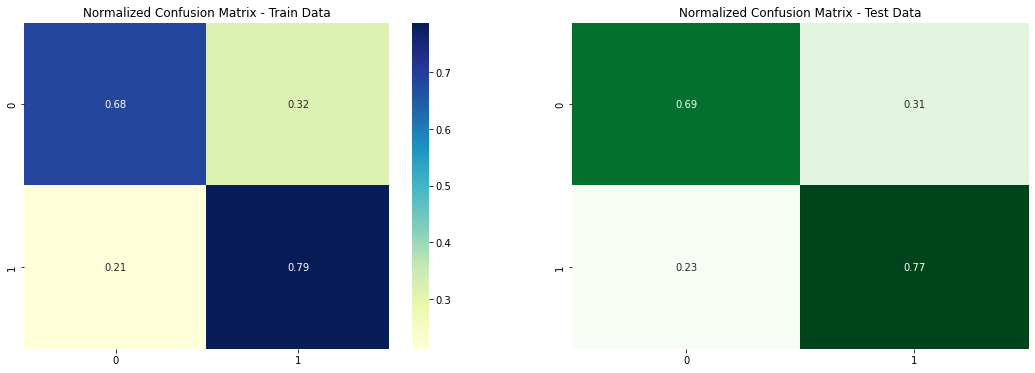

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 2020)
#lm = LogisticRegression(random_state=2020)

build_model_train_test(lm, X_sample, X_test,y_sample,y_test)


Se observa que el recall, para Logistic Regression tanto en datos de train, como en datos de test, es de: 0.79 y 0.77 respectivamente.

In [ ]:
## Training the Random Forest model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.7264883520276099
Precision Score:  0.7028380634390651
Recall Score:  0.7517857142857143

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5633802816901409
Precision Score:  0.4878048780487805
Recall Score:  0.6666666666666666


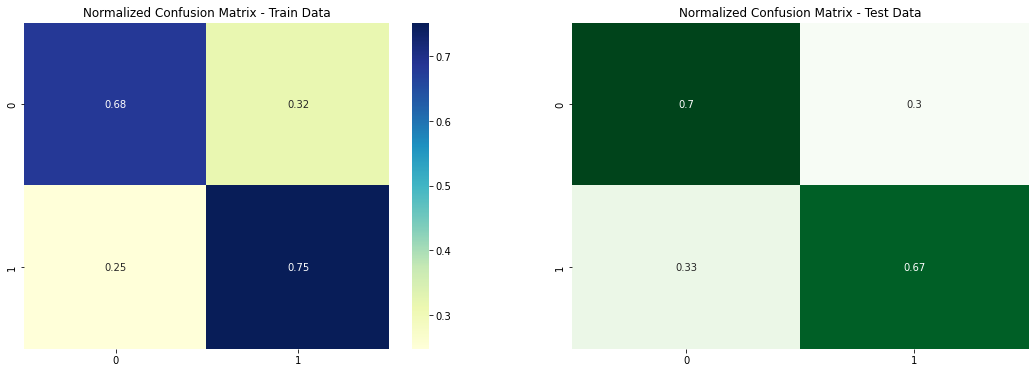

In [ ]:
from sklearn.svm import SVC
#svm = SVC(kernel ='linear', random_state = 0)
svm = SVC(kernel = 'linear', random_state = 0)
#lm.fit(X_sample, y_sample)
build_model_train_test(svm, X_sample, X_test,y_sample,y_test)


Se observa que el recall, para support Vector Machine tanto en datos de train, como en datos de test, es de: 0.75 y 0.67 respectivamente.

In [ ]:
## Training the Random Forest model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.9910714285714286
Precision Score:  0.9910714285714286
Recall Score:  0.9910714285714286

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5178571428571428
Precision Score:  0.5576923076923077
Recall Score:  0.48333333333333334


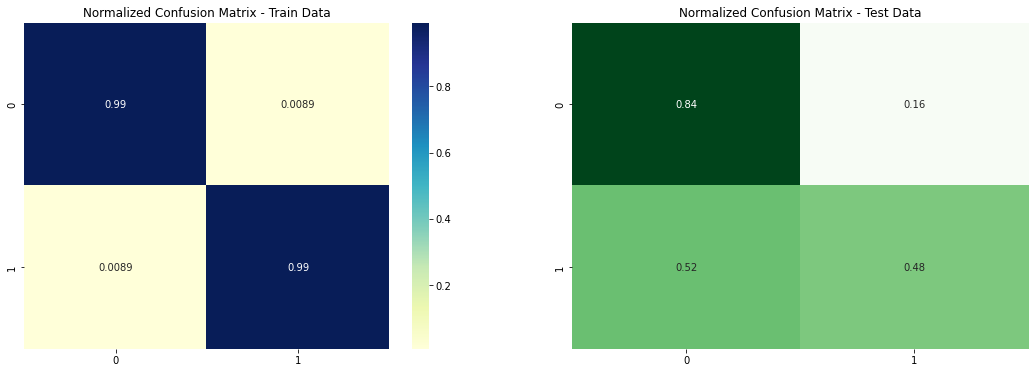

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2020)
build_model_train_test(rf, X_sample, X_test,y_sample,y_test)

Se observa que el recall, para Random Forest tanto en datos de train, como en datos de test, es de: 0.99 y 0.48 respectivamente.

In [ ]:
## Training the GradientBoostingClassifier model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.8688097306689836
Precision Score:  0.8460236886632826
Recall Score:  0.8928571428571429

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5454545454545454
Precision Score:  0.5
Recall Score:  0.6


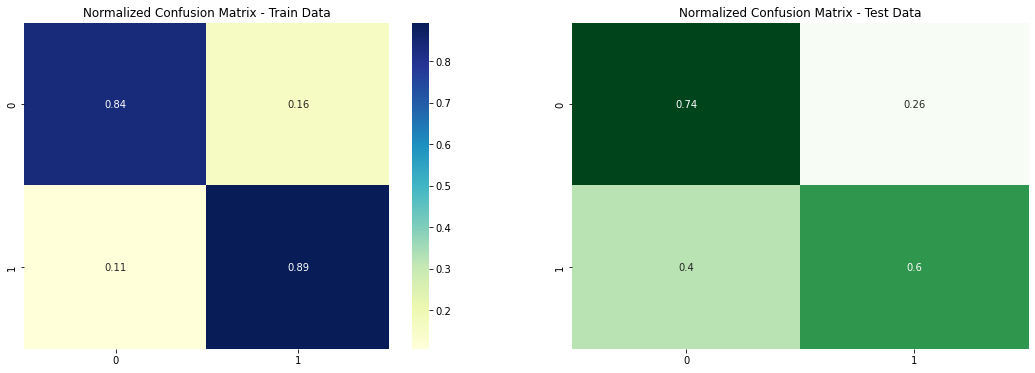

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier( random_state = 2020)

build_model_train_test(gbc, X_sample, X_test,y_sample,y_test)


Se observa que el recall, para Gradient Boosting tanto en datos de train, como en datos de test, es de: 0.89 y 0.6 respectivamente.

In [ ]:
#  Training the  XGBoost model on the Training set 


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.7678883071553227
Precision Score:  0.7508532423208191
Recall Score:  0.7857142857142857

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.608695652173913
Precision Score:  0.5384615384615384
Recall Score:  0.7


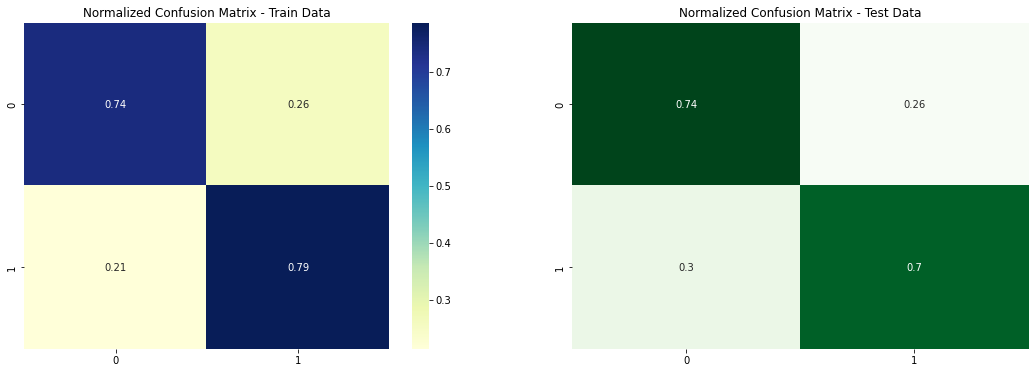

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(random_state = 2020)

# Train Adaboost Classifer
build_model_train_test(abc, X_sample, X_test,y_sample,y_test)

Se observa que el recall, para AdaBoost tanto en datos de train, como en datos de test, es de: 0.79 y 0.7 respectivamente.

**Cuáles son los 2 mejores modelos?**

De los resultados de Recall, se observa que los mejores rendimientos se obtuvieron con el modelo de Support vector Machine  y Logistic Regression, con recall de 0.76 y 0.7 respectivamente.